# [9660] Exploratory Data Analysis
Data files:
* Part 1 - https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/insurance_rates.csv
* Part 2 - https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/Aus_weather.csv

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 09/16/24 12:34:08


### Import libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt     # same as 'import matplotlib.pyplot as plt'
import seaborn as sns

## Part 1

### Load data
Columns
* age: age of primary beneficiary
* sex: female=0, male=1
* bmi: body mass index
* children: # of children covered by health insurance
* smoker: yes=1, no=0
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: individual medical costs billed by health insurance

In [3]:
# Read data file (insurance_rates.csv) into a dataframe
#  Default field separator is ','
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/insurance_rates.csv',
                 sep=',')

In [4]:
# Display shape of dataframe
df.shape

(1338, 7)

In [5]:
# Display info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   int64  
 2   smoker    1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [6]:
# Display columns
df.columns

Index(['age', 'gender', 'smoker', 'bmi', 'children', 'region', 'charges'], dtype='object')

In [7]:
# Display column datatypes
df.dtypes

,0
age,int64
gender,int64
smoker,int64
bmi,float64
children,int64
region,object
charges,float64


In [8]:
# Display first few rows
df.head()

,age,gender,smoker,bmi,children,region,charges
0,19,0,1,27.900,0,southwest,16884.92400
1,18,1,0,33.770,1,southeast,1725.55230
2,28,1,0,33.000,3,southeast,4449.46200
3,33,1,0,22.705,0,northwest,21984.47061
4,32,1,0,28.880,0,northwest,3866.85520


In [9]:
# Display last few rows
df.tail()

,age,gender,smoker,bmi,children,region,charges
1333,50,1,0,30.97,3,northwest,10600.5483
1334,18,0,0,31.92,0,northeast,2205.9808
1335,18,0,0,36.85,0,southeast,1629.8335
1336,21,0,0,25.80,0,southwest,2007.9450
1337,61,0,1,29.07,0,northwest,29141.3603


In [10]:
# Display random sample of N rows
df.sample(15)

,age,gender,smoker,bmi,children,region,charges
1067,39,1,0,42.655,0,northeast,5757.41345
1264,49,0,0,33.345,2,northeast,10370.91255
1216,40,1,0,25.080,0,southeast,5415.66120
572,30,0,0,43.120,2,southeast,4753.63680
486,54,0,0,21.470,3,northwest,12475.35130
111,55,0,0,29.700,2,southwest,11881.35800
92,59,1,1,29.830,3,northeast,30184.93670
1032,30,0,0,27.930,0,northeast,4137.52270
1329,52,1,0,38.600,2,southwest,10325.20600
351,50,0,0,25.600,0,southwest,8932.08400


In [11]:
# Count # of duplicated rows
df.duplicated().sum()

1

In [12]:
# Display duplicated rows
df[df.duplicated(keep=False)]

,age,gender,smoker,bmi,children,region,charges
195,19,1,0,30.59,0,northwest,1639.5631
581,19,1,0,30.59,0,northwest,1639.5631


In [13]:
# Remove duplicate rows based on all columns keeping only the first occurrence of each unique row
df.drop_duplicates(inplace=True)

In [14]:
# Count # of duplicated rows
df.duplicated().sum()

0

In [15]:
# Generate summary statistics for numeric columns
df.describe()

,age,gender,smoker,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,0.204936,30.663452,1.095737,13279.121487
std,14.044333,0.500163,0.403806,6.100468,1.205571,12110.359656
min,18.000000,0.000000,0.000000,15.960000,0.000000,1121.873900
25%,27.000000,0.000000,0.000000,26.290000,0.000000,4746.344000
50%,39.000000,1.000000,0.000000,30.400000,1.000000,9386.161300
75%,51.000000,1.000000,0.000000,34.700000,2.000000,16657.717450
max,64.000000,1.000000,1.000000,53.130000,5.000000,63770.428010


In [16]:
# Generate summary statistics for numeric columns in transposed format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
gender,1337.0,0.504862,0.500163,0.0000,0.000,1.0000,1.00000,1.00000
smoker,1337.0,0.204936,0.403806,0.0000,0.000,0.0000,0.00000,1.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


### Visualize data using Pandas

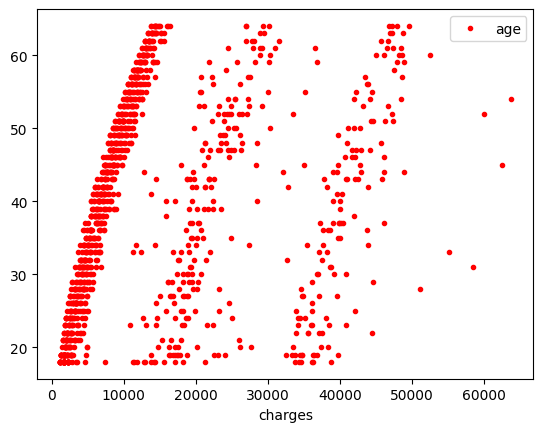

In [17]:
# Plot charges vs age (using red points)
df.plot(x='charges', y='age', style='r.')
plt.show()

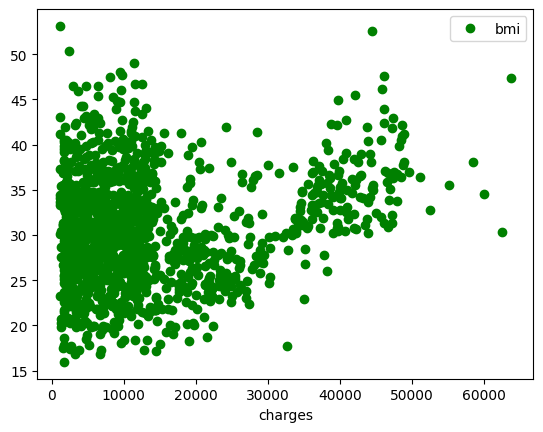

In [18]:
# Plot charges vs age (using green circles)
df.plot(x='charges', y='bmi', style='go')
plt.show()

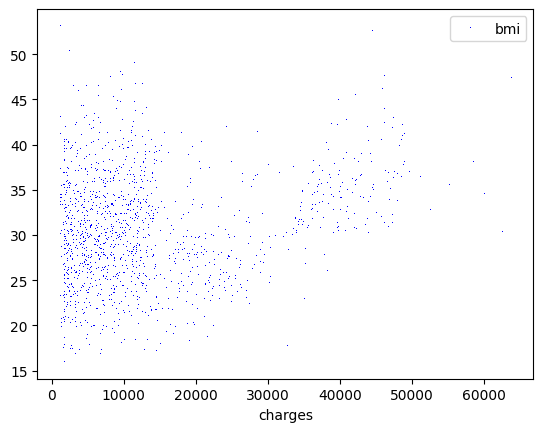

In [19]:
# Plot charges vs age (using blue pixels)
df.plot(x='charges', y='bmi', style='b,')
plt.show()

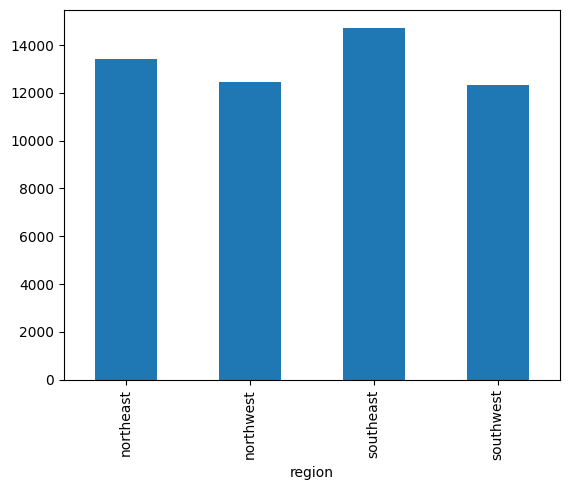

In [20]:
# Display average charges by region
df.groupby('region')['charges'].mean().plot(kind='bar')
plt.show()

### Visualize data using Matplotlib

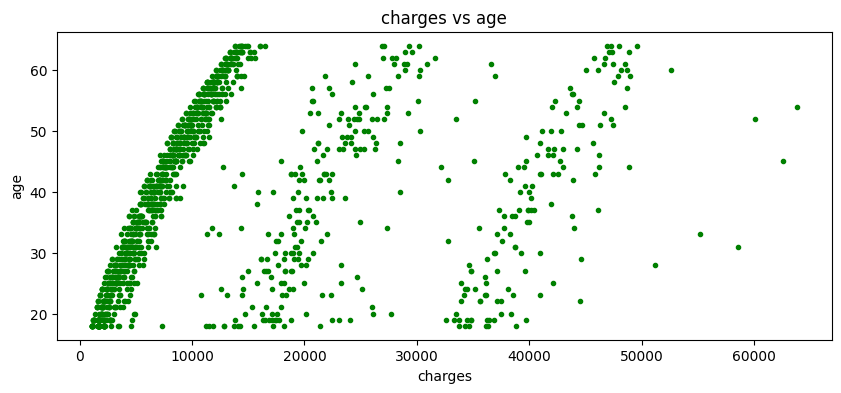

In [21]:
# Plot variable charges vs age
plt.figure(figsize=(10, 4))
plt.plot(df['charges'], df['age'], 'g.')     # green points
plt.title('charges vs age')
plt.xlabel('charges')
plt.ylabel('age')
plt.show()

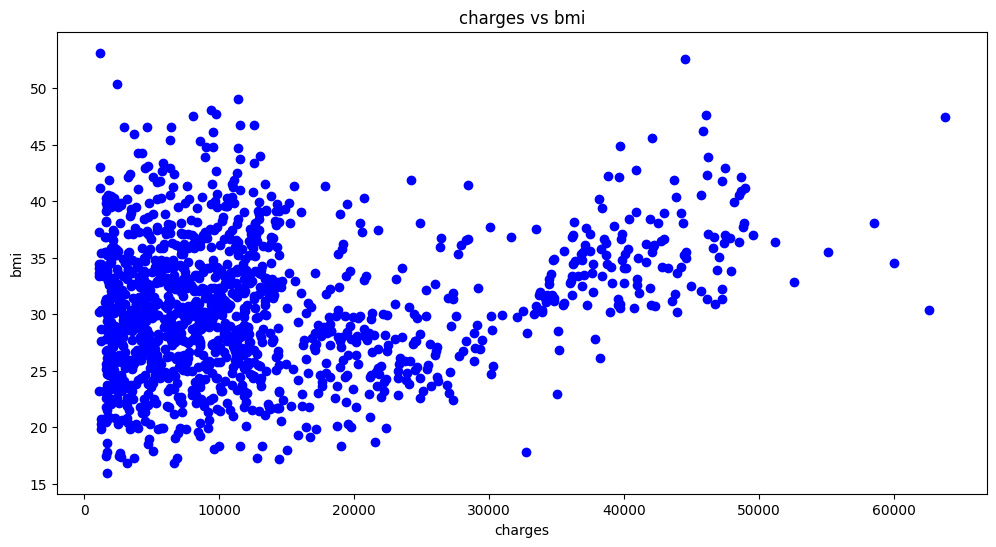

In [22]:
# Plot variable charges vs bmi
plt.figure(figsize=(12, 6))
plt.plot(df['charges'], df['bmi'], 'bo')     # blue circles
plt.title('charges vs bmi')
plt.xlabel('charges')
plt.ylabel('bmi')
plt.show()

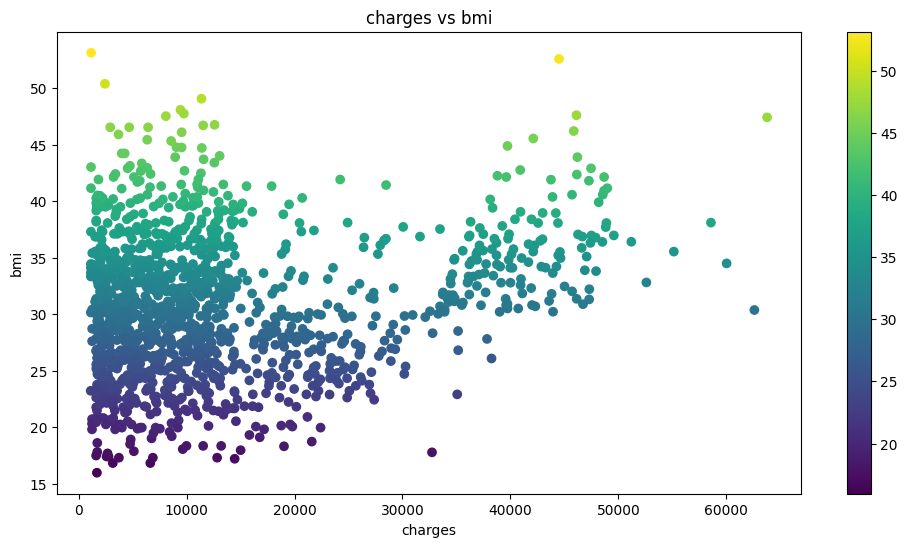

In [23]:
# Plot variable charges vs bmi using the default color map 'viridis'
plt.figure(figsize=(12, 6))
plt.scatter(df['charges'], df['bmi'], c=df['bmi'])
plt.colorbar()
plt.title('charges vs bmi')
plt.xlabel('charges')
plt.ylabel('bmi')
plt.show()

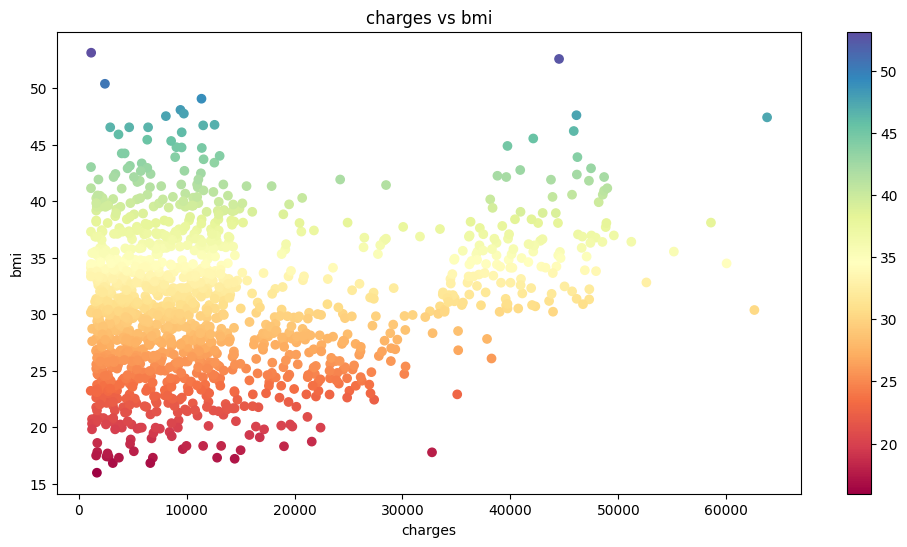

In [24]:
# Plot variable charges vs bmi using a diverging color map
plt.figure(figsize=(12, 6))
plt.scatter(df['charges'], df['bmi'], c=df['bmi'], cmap='Spectral')
plt.colorbar()
plt.title('charges vs bmi')
plt.xlabel('charges')
plt.ylabel('bmi')
plt.show()

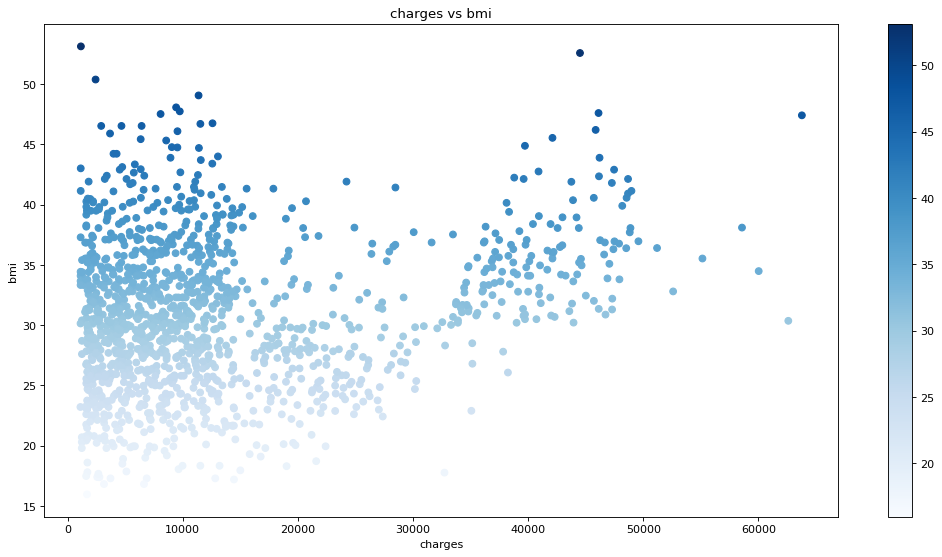

In [25]:
# Plot variable charges vs bmi in a wider format using a sequential color map of blues
plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(df['charges'], df['bmi'], c=df['bmi'], cmap='Blues')
plt.colorbar()
plt.title('charges vs bmi')
plt.xlabel('charges')
plt.ylabel('bmi')
plt.show()

### Visualize data using Seaborn

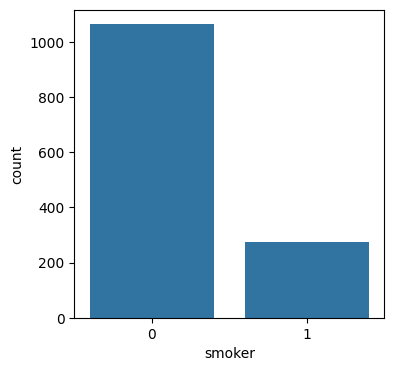

In [26]:
# Display countplot
plt.figure(figsize=[4,4])
sns.countplot(x='smoker', data=df)
plt.show()

In [27]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [28]:
region_counts=list(df['region'].value_counts().values)
region_counts

[364, 325, 324, 324]

In [29]:
region_labels=list(df['region'].value_counts().index)
region_labels

['southeast', 'southwest', 'northwest', 'northeast']

In [30]:
wedge_setting = 0.1
explode_settings = tuple([wedge_setting for _ in region_counts])
explode_settings

(0.1, 0.1, 0.1, 0.1)

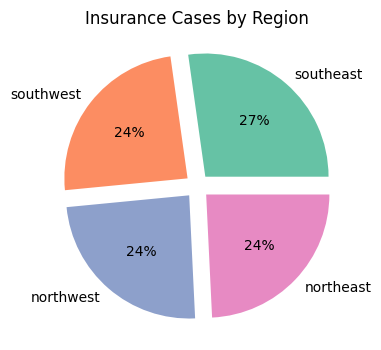

In [31]:
# Display pie chart of cases by region
plt.figure(figsize=[4,4])
plt.pie(region_counts, labels=region_labels, explode=explode_settings, autopct='%0.0f%%',
        colors=sns.color_palette('Set2'), startangle=0, labeldistance=1.1)
plt.title('Insurance Cases by Region')
plt.show()

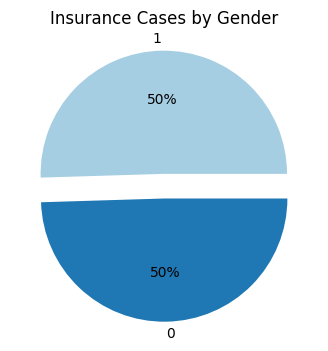

In [32]:
# Display pie chart of cases by gender
gender_counts=list(df['gender'].value_counts().values)
gender_labels=list(df['gender'].value_counts().index)
wedge_setting = 0.1
explode_settings = tuple([wedge_setting for _ in gender_counts])
plt.figure(figsize=[4,4])
plt.pie(gender_counts, labels=gender_labels, explode=explode_settings, autopct='%0.0f%%',
        colors=sns.color_palette('Paired'), startangle=0, labeldistance=1.1)
plt.title('Insurance Cases by Gender')
plt.show()

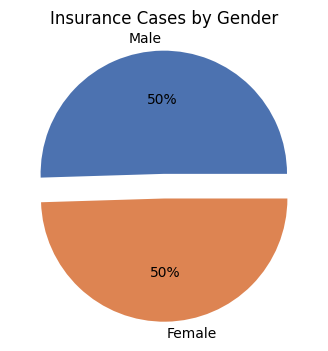

In [33]:
# Display pie chart of cases by region (with labels)
gender_labels=['Male','Female']
plt.figure(figsize=[4,4])
plt.pie(gender_counts, labels=gender_labels, explode=explode_settings, autopct='%0.0f%%',
        colors=sns.color_palette('deep'), startangle=0, labeldistance=1.1)
plt.title('Insurance Cases by Gender')
plt.show()

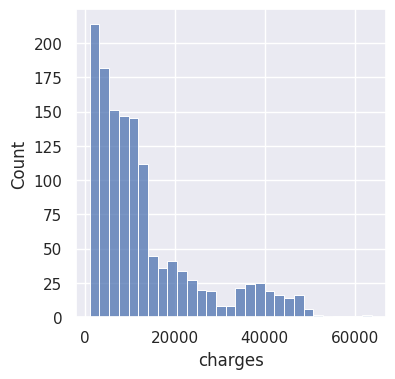

In [34]:
# Display histogram of charges
plt.figure(figsize=[4,4])
sns.set(style="darkgrid")
sns.histplot(data=df, x='charges')
plt.show()

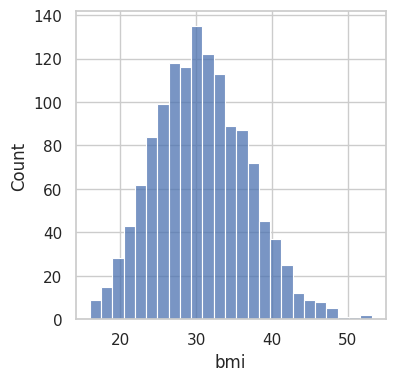

In [35]:
# Display histogram of BMI
plt.figure(figsize=[4,4])
sns.set(style="whitegrid")
sns.histplot(data=df, x='bmi')
plt.show()

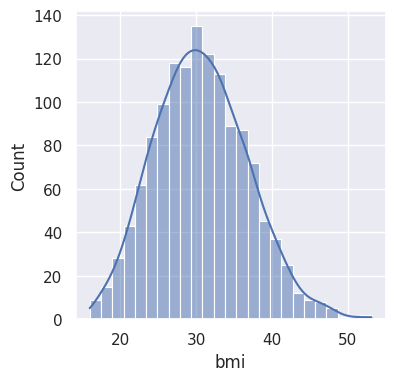

In [36]:
# Display histogram of BMI with a kdeplot overlay
#  A kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function
#   of the continuous data variable
plt.figure(figsize=[4,4])
sns.set(style="darkgrid")
sns.histplot(data=df, x='bmi', kde=True)
plt.show()

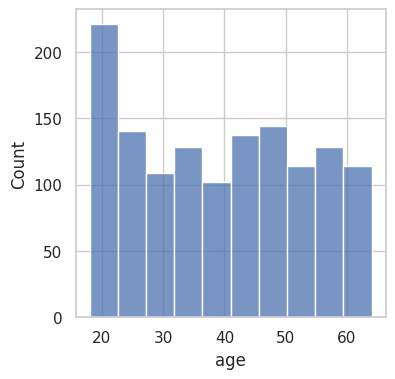

In [37]:
# Display histogram of age (in 10 bins)
plt.figure(figsize=[4,4])
sns.set(style="whitegrid")
sns.histplot(data=df, x='age', bins=10)
plt.show()

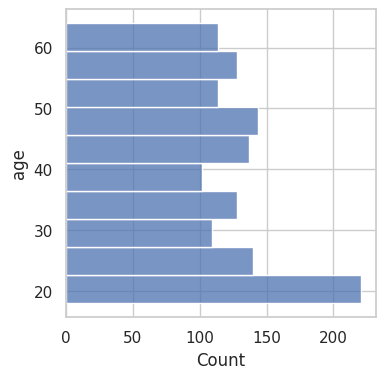

In [38]:
# Display rotated histogram of age (in 10 bins)
plt.figure(figsize=[4,4])
sns.set(style="whitegrid")
sns.histplot(data=df, y='age', bins=10)
plt.show()

### Display the correlation matrix showing the correlations of the features with each other

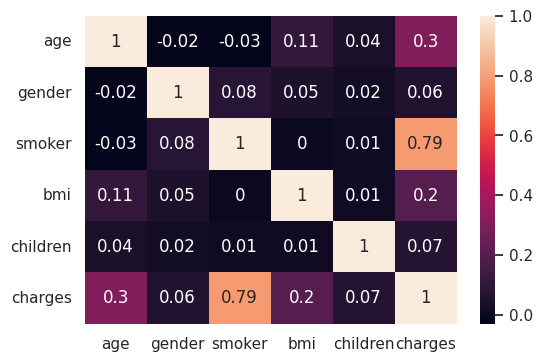

In [39]:
# Display full correlation matrix
plt.figure(figsize=(6,4))
# Calculate the linear relationships between the variables
correlation_matrix = df.corr(numeric_only=True).round(2)
sns.heatmap(correlation_matrix, annot = True)
plt.show()

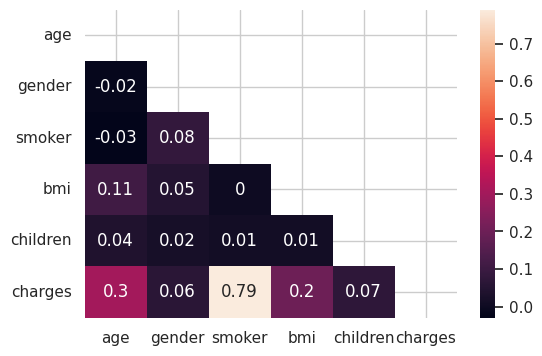

In [40]:
# Display bottom half of correlation matrix
plt.figure(figsize=(6,4))
# Calculate the linear relationships between the variables
correlation_matrix = df.corr(numeric_only=True).round(2)
# Display only relevant portion of matrix
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True          # numpy triu returns the upper triangle of an array
sns.heatmap(correlation_matrix, annot = True, mask=mask)
plt.show()

## Part 2

### Load another dataset

In [41]:
# Read data file (Aus_weather.csv) into a dataframe
df2 = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/Aus_weather.csv',
                  index_col=0)

In [42]:
df2.shape

(145460, 22)

In [43]:
df2.head(15)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes


In [44]:
# Display all columns
pd.set_option('display.max_columns', None)

In [45]:
df2.head(15)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes


In [46]:
# Display count of missing values
#  isna() and isnull() are equivalent
#  NaN is considered a missing value
df2.isna().sum()

,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566
WindDir3pm,4228


In [47]:
# Drop all rows where WindGustSpeed is NaN
df2 = df2.dropna(subset=['WindGustDir'])

In [48]:
df2.shape

(135134, 22)

In [49]:
df2.isnull().sum()

,0
Location,0
MinTemp,738
MaxTemp,562
Rainfall,2660
Evaporation,57516
Sunshine,64047
WindGustDir,0
WindGustSpeed,0
WindDir9am,7615
WindDir3pm,970


In [50]:
df2.head(15)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes


In [51]:
# Display summary statistics for all numeric columns
df2.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,134396.000000,134572.000000,132474.000000,77618.000000,71087.000000,135134.000000,134791.000000,134853.000000,133241.000000,132759.000000,124354.000000,124395.000000,81552.000000,79492.000000,134045.000000,133587.000000
mean,12.144036,23.287516,2.329065,5.514989,7.648307,40.035106,14.228932,18.771863,68.629911,51.120813,1017.628408,1015.220109,4.437083,4.510139,16.985706,21.741268
std,6.462347,7.201843,8.402218,4.220401,3.787404,13.607080,8.792967,8.682182,19.227565,20.866908,7.100802,7.030968,2.888186,2.722881,6.565138,7.007074
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.500000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,36.000000,1012.900000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.900000,22.800000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,51.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.200000
75%,16.800000,28.400000,0.600000,7.400000,10.700000,48.000000,20.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.600000
max,33.900000,48.100000,367.600000,86.200000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [52]:
# Display the # of unique values for each column
df2.nunique()

,0
Location,47
MinTemp,389
MaxTemp,504
Rainfall,653
Evaporation,357
Sunshine,145
WindGustDir,16
WindGustSpeed,67
WindDir9am,16
WindDir3pm,16


In [53]:
# Display a column's unique values
df2.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong',
       'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo',
       'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil',
       'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth',
       'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings',
       'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [54]:
# Display the counts for each of the unique values in column 'Location' in descending count order
df2.Location.value_counts()

,count
Location,
Perth,3188
Melbourne,3179
Hobart,3170
Adelaide,3167
Brisbane,3152
Darwin,3147
Canberra,3097
Cairns,3021
Townsville,3017


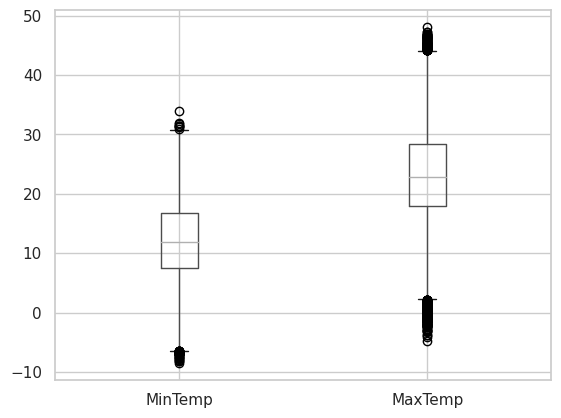

In [55]:
# Display a Pandas boxplot for columns MinTemp and MaxTemp
df2.boxplot(['MinTemp','MaxTemp'])
plt.show()

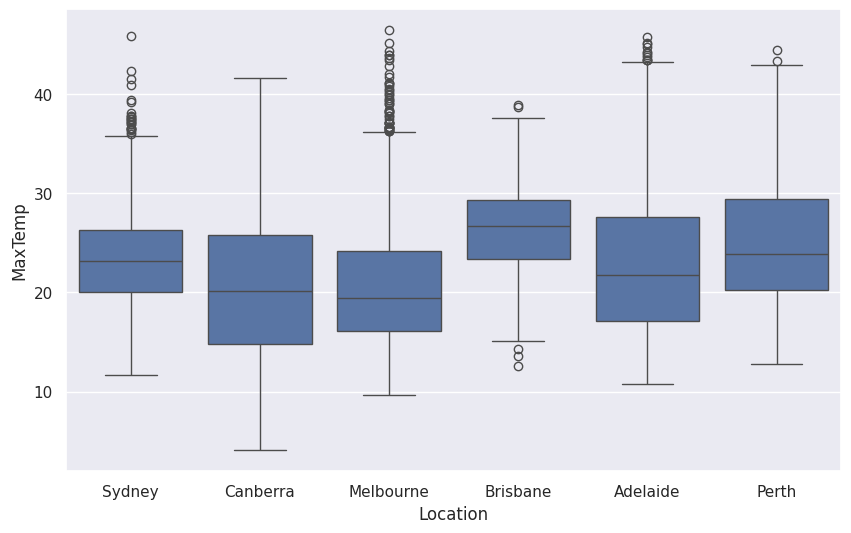

In [56]:
# Reset dataframe index
df2 = df2.reset_index(drop=True)

# Display a Seaborn boxplot of temperature ranges for selected cities
sns.set(rc={'figure.figsize':(10,6)})
sns.boxplot(x='Location', y='MaxTemp', \
            data=df2[df2['Location'].isin(['Sydney','Canberra','Brisbane','Adelaide','Melbourne','Perth'])])
plt.show()